# **Análisis de Sistemas Térmicos usando Python**

In [1]:
#pip install Coolprop

In [2]:
#pip install beautifultable

In [3]:
import CoolProp.CoolProp as cp
import numpy as np
import matplotlib.pyplot as plt

## Ejemplo Ciclo Rankine

Consideremos el ciclo Rankine en la Figura, que usa agua como fluido de trabajo.

Asumimos que las pérdidas de presión en los intercambiadores de calorson despreciadas.

La turbina y la bomba de alimentación tienen una eficiencia isentrópica constante. 

* $\eta_t$ = 0.9
* $\eta_p$ = 0.75

Además, se establecen la temperatura, presión y flujo de masa de agua a la salida de la caldera y el nivel de presión de condensación.

* Estado 1 : $T_1$ = 600 °C; $P_1$ = 150 bar; $\dot{m}_1$ = 10 kg/s;  
* Estado 2 : $P_2$ = 0.1 bar;

Por último, establecemos la temperatura de alimentación y retorno del agua de enfriamiento, así como su presión de alimentación.

* Estado 11: $T_11$ = 20°C; $P_11$ = 1.2 bar; 
* Estado 12: $T_12$ = 30°C.

![Rankine Cycle](rankine_cycle_darkmode.png)


Una alternativa es resolver usando Coolprop

In [4]:
# Se selecciona el fluido de trabajo y se inicializan las variables estado
# (Presión, Temperatura, Velocidad, calidad, entalpía)
fluid = "Water"
m_dot = 10 # kg/s
n_estados = 6
P,T,h,s,x = ([np.empty]*n_estados for i in range(5))
Estado = []

eta_t = 0.9
eta_p = 0.75

En la entrada de la turbina

In [5]:
Estado.append('Estado 1')
P[0] = 15e6 # Pa
T[0] = 600 + 273.15 # K
h[0] = cp.PropsSI('H', 'P', P[0], 'T', T[0], fluid) # J/kg
s[0] = cp.PropsSI('S', 'P', P[0], 'T', T[0], fluid) # J/kg-K
x[0] = cp.PropsSI('Q', 'P', P[0], 'T', T[0], fluid) # -

In [6]:
Estado.append('Estado 2')
P[1] = 10e3 # Pa
h_1_aux = cp.PropsSI('H', 'P', P[1], 'S', s[0], fluid) # J/kg

h[1] = h[0] - eta_t*(h[0] - h_1_aux) # J/kg
s[1] = cp.PropsSI('S', 'P', P[1], 'H', h[1], fluid) # J/kg-K
T[1] = cp.PropsSI('T', 'P', P[1], 'H', h[1], fluid) # K
x[1] = cp.PropsSI('Q', 'P', P[1], 'H', h[1], fluid) # -

In [7]:
Estado.append('Estado 3')
P[2] = P[1]
x[2] = 0
T[2] = cp.PropsSI('T', 'P', P[2], 'Q', x[2], fluid) # K
h[2] = cp.PropsSI('H', 'P', P[2], 'Q', x[2], fluid) # J/kg
s[2] = cp.PropsSI('S', 'P', P[2], 'Q', x[2], fluid) # J/kg-K


In [8]:
Estado.append('Estado 4')
P[3] = P[0]
h_3_aux = cp.PropsSI('H', 'P', P[3], 'S', s[2], fluid) # J/kg
h[3] = h[2] + (h_3_aux -h[2] )/eta_p # J/kg

T[3] = cp.PropsSI('T', 'P', P[3], 'H', h[3], fluid) # K
s[3] = cp.PropsSI('S', 'P', P[3], 'H', h[3], fluid) # J/kg-K
x[3] = cp.PropsSI('Q', 'P', P[3], 'H', h[3], fluid) # -

In [9]:
Estado.append('Estado 4_1')
P[4] = P[0]
x[4] = 0
T[4] = cp.PropsSI('T', 'P', P[4], 'Q', x[4], fluid) # K
h[4] = cp.PropsSI('H', 'P', P[4], 'Q', x[4], fluid) # J/kg
s[4] = cp.PropsSI('S', 'P', P[4], 'Q', x[4], fluid) # J/kg-K

In [10]:
Estado.append('Estado 4_2')
P[5] = P[0]
x[5] = 1
T[5] = cp.PropsSI('T', 'P', P[5], 'Q', x[5], fluid) # K
h[5] = cp.PropsSI('H', 'P', P[5], 'Q', x[5], fluid) # J/kg
s[5] = cp.PropsSI('S', 'P', P[5], 'Q', x[5], fluid) # J/kg-K

In [11]:
from beautifultable import BeautifulTable as bt

In [12]:
print('Estados termodinámicos')
table = bt()
table = bt(maxwidth=100)
table.columns.append([j//1e3 for j in P], header="Presión\n[kPa]")
table.columns.append([j-273.15 for j in T], header="Temperatura\n[C]")
table.columns.append(x, header="Calidad \n[-]")
table.columns.append([j//1e3 for j in h], header="Entalpía\n[kJ/kg]")
table.columns.append([j//1e3 for j in s], header="Entropía\n[kJ/kg K]")

table.rows.header = Estado
print(table)

Estados termodinámicos
+------------+---------+-------------+----------+----------+-----------+
|            | Presión | Temperatura | Calidad  | Entalpía | Entropía  |
|            |  [kPa]  |     [C]     |   [-]    | [kJ/kg]  | [kJ/kg K] |
+------------+---------+-------------+----------+----------+-----------+
|  Estado 1  | 15000.0 |    600.0    |   -1.0   |  3583.0  |    6.0    |
+------------+---------+-------------+----------+----------+-----------+
|  Estado 2  |  10.0   |   45.806    |  0.865   |  2262.0  |    7.0    |
+------------+---------+-------------+----------+----------+-----------+
|  Estado 3  |  10.0   |   45.806    |    0     |  191.0   |    0.0    |
+------------+---------+-------------+----------+----------+-----------+
|  Estado 4  | 15000.0 |   47.518    |   -1.0   |  211.0   |    0.0    |
+------------+---------+-------------+----------+----------+-----------+
| Estado 4_1 | 15000.0 |   342.155   |    0     |  1610.0  |    3.0    |
+------------+---------+----

c:\Users\jmcar\anaconda3\envs\Thermodynamics\Lib\site-packages\CoolProp\Plots\Common.py:608: UserWarning: Please use "calc_sat_range" to calculate saturation and isoquality lines. Input ranges are discarded.
  warnings.warn(
c:\Users\jmcar\anaconda3\envs\Thermodynamics\Lib\site-packages\CoolProp\Plots\Common.py:608: UserWarning: Please use "calc_sat_range" to calculate saturation and isoquality lines. Input ranges are discarded.
  warnings.warn(
c:\Users\jmcar\anaconda3\envs\Thermodynamics\Lib\site-packages\CoolProp\Plots\Plots.py:217: UserWarning: Detected an incomplete phase envelope, fixing it numerically.
  warnings.warn("Detected an incomplete phase envelope, fixing it numerically.")


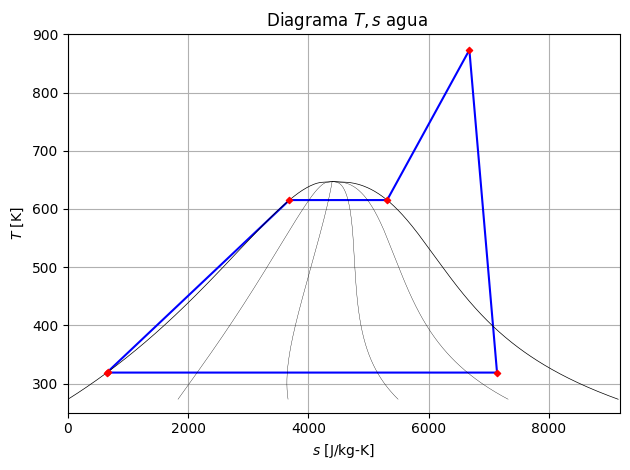

In [13]:
from CoolProp.Plots import PropertyPlot

td_plot = PropertyPlot('Water', 'TS', tp_limits='ORC', unit_system='SI')
td_plot.calc_isolines(cp.iQ, num=6)

ax = plt.gca() # Axis del PropertyPlot
ax.scatter(s,T,c='r',s=10,zorder=3,marker='D') # Puntos con los estado termodinámicos
e_v = 0.5 # Espaciamiento vertical
e_h = 1 # Espaciamiento horizontal

from matplotlib.lines import Line2D
line = Line2D(s,T,color='b')
ax.add_line(line)
line_close = Line2D([s[0],s[5]],[T[0],T[5]],color='b')
ax.add_line(line_close)

ax.set_ylim(250,900) # Modificar los límites 'ORC' en y
td_plot.title(r' Diagrama $T,s$ agua')
td_plot.xlabel(r'$s$ [J/kg-K]')
td_plot.ylabel(r'$T$ [K]')
td_plot.grid()
td_plot.show()

# Alternativa: Biblioteca TESpy

In [14]:
from tespy.networks import Network

In [15]:
my_plant = Network()
my_plant.set_attr(T_unit='C', p_unit='bar', h_unit='kJ / kg')

In [16]:
from tespy.components import (
    CycleCloser, Pump, Condenser, Turbine, SimpleHeatExchanger, Source, Sink
)

cc = CycleCloser('cycle closer')
sg = SimpleHeatExchanger('steam generator')
mc = Condenser('main condenser')
tu = Turbine('steam turbine')
fp = Pump('feed pump')

cwso = Source('cooling water source')
cwsi = Sink('cooling water sink')

In [17]:
from tespy.connections import Connection

c1 = Connection(cc, 'out1', tu, 'in1', label='1')
c2 = Connection(tu, 'out1', mc, 'in1', label='2')
c3 = Connection(mc, 'out1', fp, 'in1', label='3')
c4 = Connection(fp, 'out1', sg, 'in1', label='4')
c0 = Connection(sg, 'out1', cc, 'in1', label='0')

my_plant.add_conns(c1, c2, c3, c4, c0)

c11 = Connection(cwso, 'out1', mc, 'in2', label='11')
c12 = Connection(mc, 'out2', cwsi, 'in1', label='12')

my_plant.add_conns(c11, c12)

In [20]:
mc.set_attr(pr1=1, pr2=1)
sg.set_attr(pr=1)
tu.set_attr(eta_s=0.9)
fp.set_attr(eta_s=0.75)

c11.set_attr(T=20, p=1.2, fluid={'water': 1})
c12.set_attr(T=30)
c1.set_attr(T=600, p=150, m=10, fluid={'water': 1})
c2.set_attr(p=0.1)

my_plant.solve(mode='design')
my_plant.print_results()


 iter  | residual   | progress   | massflow   | pressure   | enthalpy   | fluid      | component  
-------+------------+------------+------------+------------+------------+------------+------------
 1     | 1.67e+06   | 0 %        | 2.59e-02   | 1.67e+06   | 2.23e+03   | 0.00e+00   | 0.00e+00   
 2     | 5.33e-01   | 69 %       | 1.08e-05   | 5.72e-19   | 7.06e-01   | 0.00e+00   | 0.00e+00   
 3     | 1.49e-08   | 100 %      | 1.61e-09   | 1.75e-23   | 1.36e-07   | 0.00e+00   | 0.00e+00   
 4     | 7.45e-09   | 100 %      | 1.38e-09   | 7.03e-24   | 1.16e-07   | 0.00e+00   | 0.00e+00   
Total iterations: 4, Calculation time: 0.02 s, Iterations per second: 187.25

##### RESULTS (Turbine) #####
+---------------+-----------+----------+----------+
|               |         P |    eta_s |       pr |
|---------------+-----------+----------+----------|
| steam turbine | -1.32e+07 | 9.00e-01 | 6.67e-04 |
+---------------+-----------+----------+----------+
##### RESULTS (Pump) #####
+---------

Generación eléctrica como restricción

In [23]:
powergen.set_attr(P=-10e6)
c1.set_attr(m=None)

my_plant.solve(mode='design')
my_plant.print_results()


 iter  | residual   | progress   | massflow   | pressure   | enthalpy   | fluid      | component  
-------+------------+------------+------------+------------+------------+------------+------------
 1     | 3.24e+06   | 0 %        | 1.20e+02   | 1.49e-11   | 2.22e-07   | 0.00e+00   | 0.00e+00   
 2     | 2.66e-06   | 100 %      | 9.20e-11   | 2.79e-11   | 1.74e-09   | 0.00e+00   | 0.00e+00   
 3     | 7.53e-08   | 100 %      | 2.69e-11   | 9.59e-11   | 6.07e-08   | 0.00e+00   | 0.00e+00   
 4     | 1.20e-07   | 100 %      | 4.08e-11   | 9.71e-11   | 1.25e-07   | 0.00e+00   | 0.00e+00   
Total iterations: 4, Calculation time: 0.05 s, Iterations per second: 82.25

##### RESULTS (Turbine) #####
+---------------+-----------+----------+----------+
|               |         P |    eta_s |       pr |
|---------------+-----------+----------+----------|
| steam turbine | -1.05e+07 | 9.00e-01 | 3.55e-04 |
+---------------+-----------+----------+----------+
##### RESULTS (Pump) #####
+----------

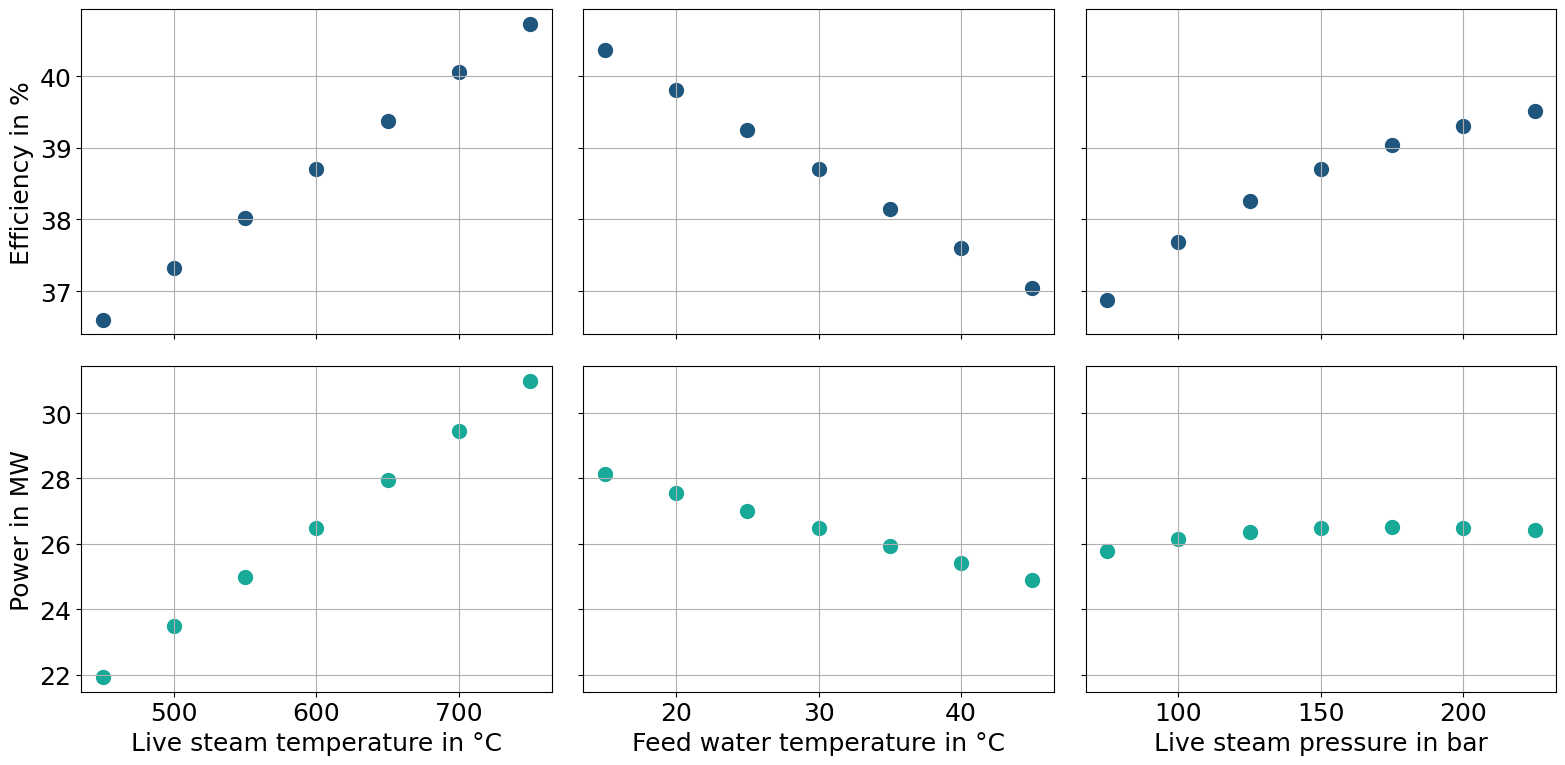

In [25]:
my_plant.set_attr(iterinfo=False)
c1.set_attr(m=20)
powergen.set_attr(P=None)
import matplotlib.pyplot as plt
import numpy as np

# make text reasonably sized
plt.rc('font', **{'size': 18})

data = {
    'T_livesteam': np.linspace(450, 750, 7),
    'T_cooling': np.linspace(15, 45, 7),
    'p_livesteam': np.linspace(75, 225, 7)
}
eta = {
    'T_livesteam': [],
    'T_cooling': [],
    'p_livesteam': []
}
power = {
    'T_livesteam': [],
    'T_cooling': [],
    'p_livesteam': []
}

for T in data['T_livesteam']:
    c1.set_attr(T=T)
    my_plant.solve('design')
    eta['T_livesteam'] += [abs(powergen.P.val) / sg.Q.val * 100]
    power['T_livesteam'] += [abs(powergen.P.val) / 1e6]

# reset to base temperature
c1.set_attr(T=600)

for T in data['T_cooling']:
    c12.set_attr(T=T)
    c11.set_attr(T=T - 10)
    my_plant.solve('design')
    eta['T_cooling'] += [abs(powergen.P.val) / sg.Q.val * 100]
    power['T_cooling'] += [abs(powergen.P.val) / 1e6]

# reset to base temperature
c12.set_attr(T=30)
c11.set_attr(T=20)

for p in data['p_livesteam']:
    c1.set_attr(p=p)
    my_plant.solve('design')
    eta['p_livesteam'] += [abs(powergen.P.val) / sg.Q.val * 100]
    power['p_livesteam'] += [abs(powergen.P.val) / 1e6]

# reset to base pressure
c1.set_attr(p=150)


fig, ax = plt.subplots(2, 3, figsize=(16, 8), sharex='col', sharey='row')

ax = ax.flatten()
[a.grid() for a in ax]

i = 0
for key in data:
    ax[i].scatter(data[key], eta[key], s=100, color="#1f567d")
    ax[i + 3].scatter(data[key], power[key], s=100, color="#18a999")
    i += 1

ax[0].set_ylabel('Efficiency in %')
ax[3].set_ylabel('Power in MW')
ax[3].set_xlabel('Live steam temperature in °C')
ax[4].set_xlabel('Feed water temperature in °C')
ax[5].set_xlabel('Live steam pressure in bar')
plt.tight_layout()
#fig.savefig('rankine_parametric.svg')
plt.show()